<a href="https://colab.research.google.com/github/ANDRERAIMUNDO/atividade-03-PPGCC-2025_1/blob/main/Atividade_03_PPGCC_2025_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questão 01

Situação: seguindo as mesmas diretrizes políticas e organizacionais como foi descrito na Atividade 02, umas das regras alinhadas às estratégias de negócios da empresa é manter problemas operacionais sempre abaixo de 6%. Os resultados obtidos mostram que todas as demandas de incidentes da empresa estão dentro dos parâmetros aceitos pela companhia com média não superior a 6.

 rootcause_seccess.csv = Atende política corporativa (média inferior a 6)
 rootcause_failure.csv = Não atende política corporativa (média superior a 6)


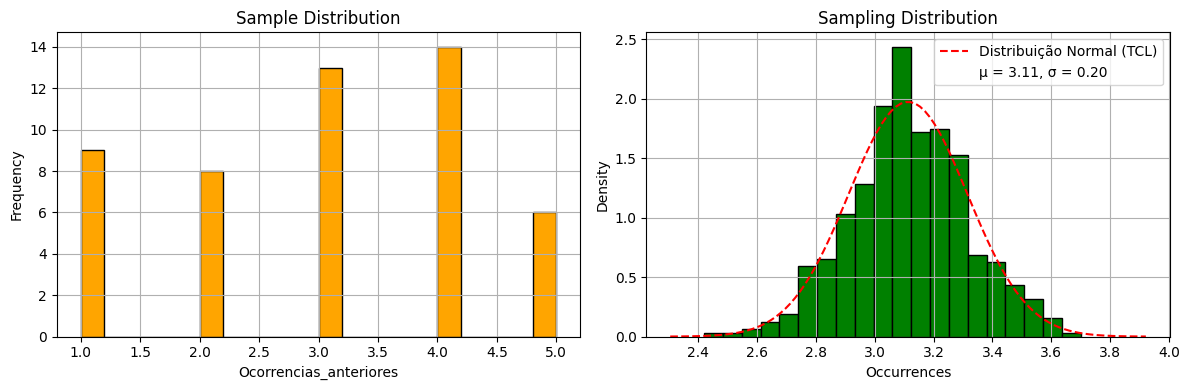

Mean of the sampling distribution (Occurrences): 3.11


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tabulate import tabulate

url = "https://raw.githubusercontent.com/ANDRERAIMUNDO/data-atividade-2/main/rootcause_success.csv"
df = pd.read_csv(url)

colum = "Ocorrencias_anteriores"

# SAMPLE DISTRIBUTION
amostra_unica = np.random.choice(df[colum], size=50, replace=True)
# SAMPLING DISTRIBUTION
n_sample = 500
size_sample = 50
medias_amostrais = [np.mean(np.random.choice(df[colum], size=size_sample, replace=True)) for _ in range(n_sample)]

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(amostra_unica, bins=20, color='orange', edgecolor='black')
plt.title("Sample Distribution")
plt.xlabel(colum)
plt.ylabel("Frequency")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(medias_amostrais, bins=20, color='green', edgecolor='black', density=True)
mu = np.mean(medias_amostrais)
sigma = np.std(medias_amostrais)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r--', label='Distribuição Normal (TCL)')
plt.plot([], [], ' ', label=f'μ = {mu:.2f}, σ = {sigma:.2f}')
plt.title("Sampling Distribution")
plt.xlabel("Occurrences")
plt.ylabel("Density")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
print(f"Mean of the sampling distribution (Occurrences): {mu:.2f}")
